In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
names_mb = ["MobileNet_BASE", "MobileNet_SPQ", "MobileNet_QAT", "MobileNet_L1_0.5", "MobileNet_L1_0.6", "MobileNet_L1_0.7", "MobileNet_L1_0.8", "MobileNet_L1_0.9", "MobileNet_OPNORM_0.5", "MobileNet_OPNORM_0.6", "MobileNet_OPNORM_0.7", "MobileNet_OPNORM_0.8", "MobileNet_OPNORM_0.9", "MobileNet_COMB"]
model_sizes_mb = [14.85, 4.48, 4.48, 7.55, 6.60, 5.82, 5.17, 4.75, 7.55,6.60, 5.82, 5.17, 4.75, 1.68]  # Example model sizes
lwlrap_values_mb = [0.74, 0.73, 0.756, 0.695, 0.665, 0.662, 0.654, 0.552, 0.675, 0.665, 0.661, 0.649, 0.494, 0.66]  # Example LWLRAP values
symbols_mb = ['o', '^', 's', 'd', 'd', 'd', 'd', 'd', 'p', 'p', 'p', 'p', 'p', "*"]  # Symbols for each model

names_cnn = ["CNN14_BASE", "CNN14_SPQ", "CNN14_QAT", "CNN14_L1_0.5", "CNN14_L1_0.6", "CNN14_L1_0.7", "CNN14_L1_0.8", "CNN14_L1_0.9", "CNN14_OPNORM_0.5", "CNN14_OPNORM_0.6", "CNN14_OPNORM_0.7", "CNN14_OPNORM_0.8", "CNN14_OPNORM_0.9", "CNN14_COMB"]
model_sizes_cnn = [305.30, 76.66, 76.66, 77.80,50.32, 29, 13.69, 4.44, 77.80,50.32, 29, 13.69, 4.44, 3.58]  # Example model sizes
lwlrap_values_cnn = [0.75, 0.74, 0.76, 0.687, 0.663, 0.662, 0.612, 0.536, 0.706, 0.683, 0.682, 0.603, 0.562, 0.61]  # Example LWLRAP values
symbols_cnn = ['o', 'D', '<', '4', '4', '4', '4', '4', 'h', 'h', 'h', 'h', 'h', "2"]  # Symbols for each model

In [9]:
names = names_mb + names_cnn
model_sizes = model_sizes_mb + model_sizes_cnn
lwlrap_values = lwlrap_values_mb + lwlrap_values_cnn
symbols = symbols_mb + symbols_cnn

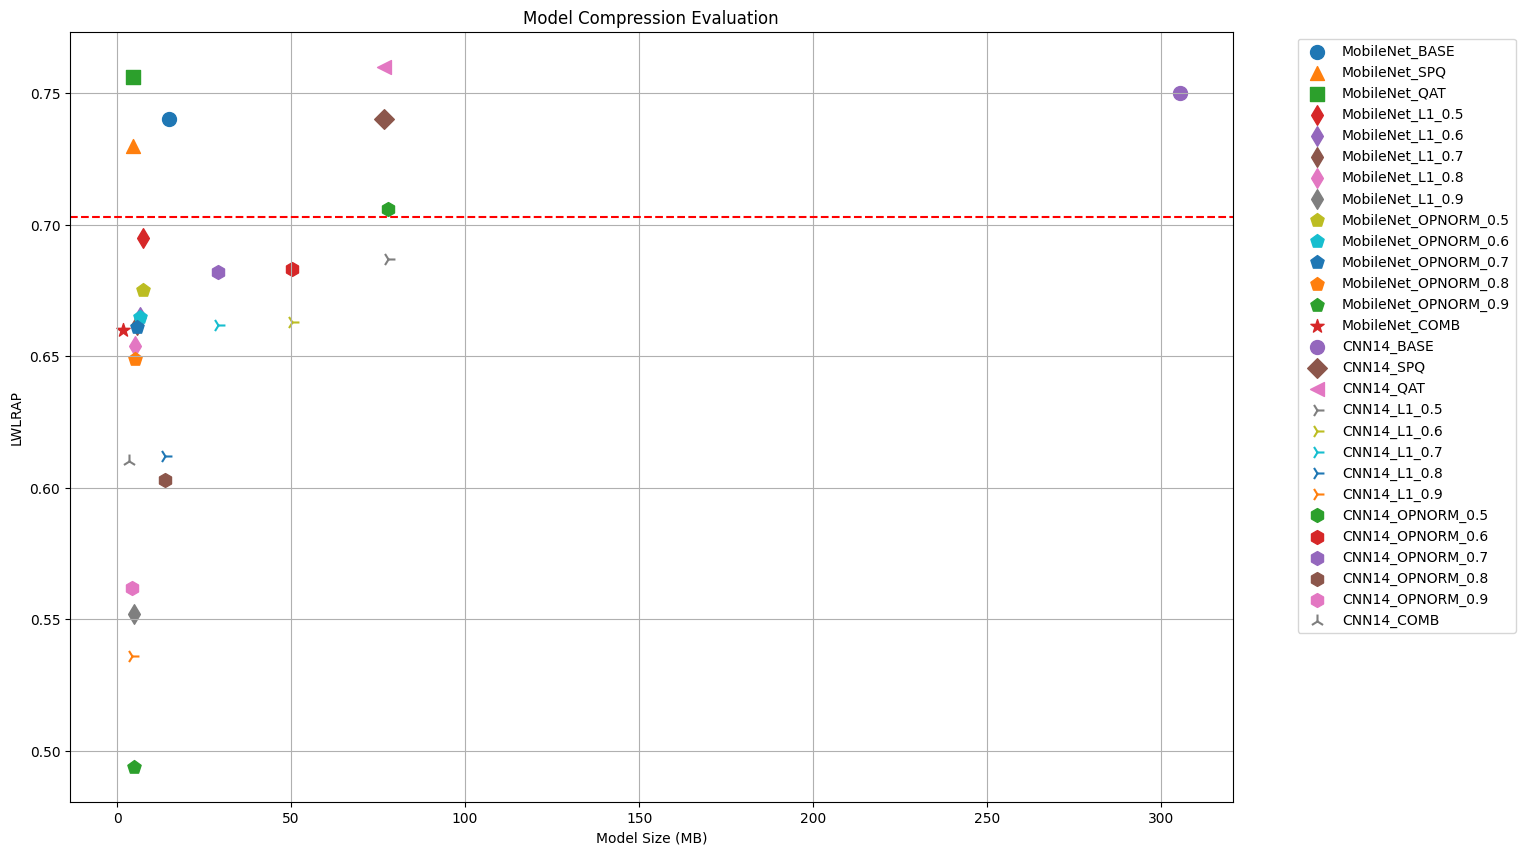

In [10]:
plt.figure(figsize=(15, 10))  # Set the figure size

# Plot each model's data point with a different symbol
for i, (name, size, lwlrap, symbol) in enumerate(zip(names, model_sizes, lwlrap_values, symbols)):
    plt.scatter(size, lwlrap, marker=symbol, label=name, s=100)

# Add a red dotted line indicating a 5% performance drop from baseline
plt.axhline(y=0.703, color='red', linestyle='--')

plt.xlabel('Model Size (MB)')  # Label for x-axis
plt.ylabel('LWLRAP')  # Label for y-axis
plt.title('Model Compression Evaluation')  # Title for the plot
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')  # Show legend

plt.grid(True)  # Show grid
plt.show()  # Show the plot


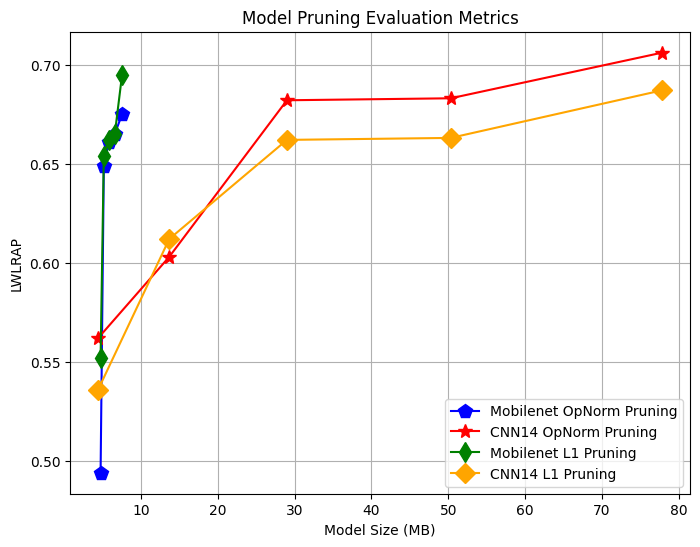

In [15]:
# MobileNet
l1_pruning_sizes_mb = [size for size, name in zip(model_sizes, names) if "MobileNet_L1" in name]
l1_pruning_values_mb = [value for value, name in zip(lwlrap_values, names) if "MobileNet_L1" in name]
opnorm_pruning_sizes_mb = [size for size, name in zip(model_sizes, names) if "MobileNet_OPNORM" in name]
opnorm_pruning_values_mb = [value for value, name in zip(lwlrap_values, names) if "MobileNet_OPNORM" in name]

# CNN14
l1_pruning_sizes_cnn = [size for size, name in zip(model_sizes, names) if "CNN14_L1" in name]
l1_pruning_values_cnn = [value for value, name in zip(lwlrap_values, names) if "CNN14_L1" in name]
opnorm_pruning_sizes_cnn = [size for size, name in zip(model_sizes, names) if "CNN14_OPNORM" in name]
opnorm_pruning_values_cnn = [value for value, name in zip(lwlrap_values, names) if "CNN14_OPNORM" in name]

# Plot the graph
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot OpNorm pruning models
plt.plot(opnorm_pruning_sizes_mb, opnorm_pruning_values_mb, marker='p', label='Mobilenet OpNorm Pruning', linestyle='-', color='blue', markersize=10)
plt.plot(opnorm_pruning_sizes_cnn, opnorm_pruning_values_cnn, marker='*', label='CNN14 OpNorm Pruning', linestyle='-', color='red', markersize=10)

# Plot L1 pruning models and connect them with lines
plt.plot(l1_pruning_sizes_mb, l1_pruning_values_mb, marker='d', label='Mobilenet L1 Pruning', linestyle='-', color='green', markersize=10)
plt.plot(l1_pruning_sizes_cnn, l1_pruning_values_cnn, marker='D', label='CNN14 L1 Pruning', linestyle='-', color='orange', markersize=10)

plt.xlabel('Model Size (MB)')  # Label for x-axis
plt.ylabel('LWLRAP')  # Label for y-axis
plt.title('Model Pruning Evaluation Metrics')  # Title for the plot
plt.legend()  # Show legend

plt.grid(True)  # Show grid
plt.show()  # Show the plot

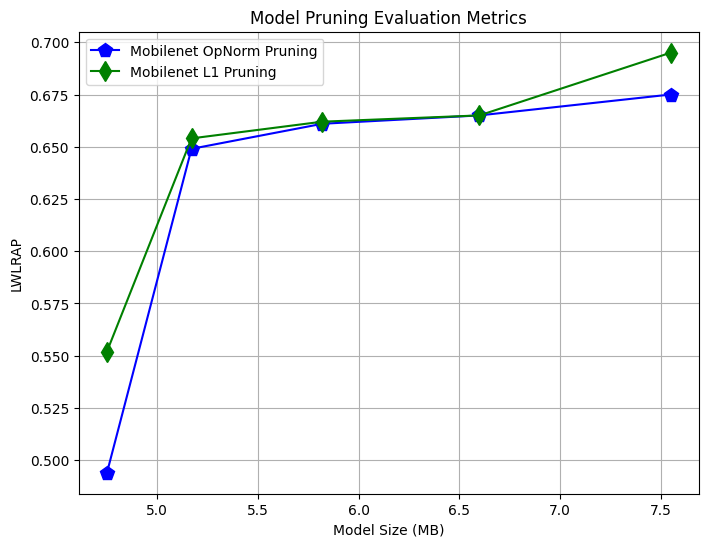

In [17]:
# Plot the graph
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot OpNorm pruning models
plt.plot(opnorm_pruning_sizes_mb, opnorm_pruning_values_mb, marker='p', label='Mobilenet OpNorm Pruning', linestyle='-', color='blue', markersize=10)
# plt.plot(opnorm_pruning_sizes_cnn, opnorm_pruning_values_cnn, marker='*', label='CNN14 OpNorm Pruning', linestyle='-', color='red', markersize=10)

# Plot L1 pruning models and connect them with lines
plt.plot(l1_pruning_sizes_mb, l1_pruning_values_mb, marker='d', label='Mobilenet L1 Pruning', linestyle='-', color='green', markersize=10)
# plt.plot(l1_pruning_sizes_cnn, l1_pruning_values_cnn, marker='D', label='CNN14 L1 Pruning', linestyle='-', color='orange', markersize=10)

plt.xlabel('Model Size (MB)')  # Label for x-axis
plt.ylabel('LWLRAP')  # Label for y-axis
plt.title('MobileNet Model Pruning Evaluation Metrics')  # Title for the plot
plt.legend()  # Show legend

plt.grid(True)  # Show grid
plt.show()  # Show the plot

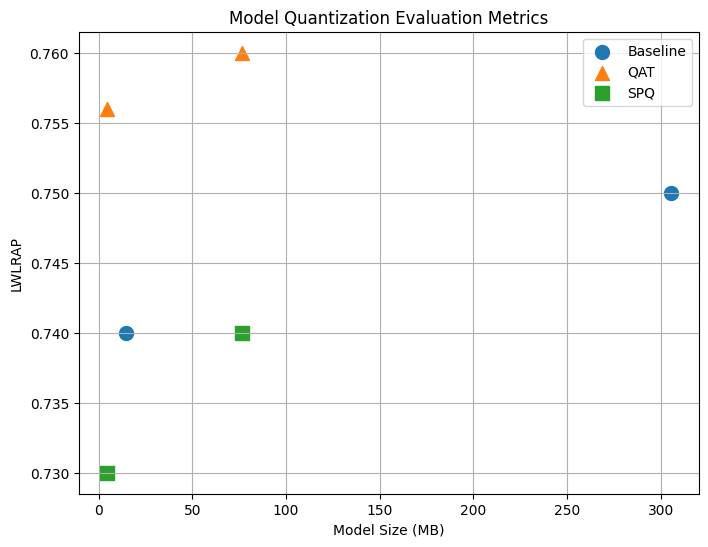

In [16]:
# Filter baseline, QAT, and SPQ
baseline_sizes = [size for size, name in zip(model_sizes, names) if "BASE" in name]
baseline_values = [value for value, name in zip(lwlrap_values, names) if "BASE" in name]
qat_sizes = [size for size, name in zip(model_sizes, names) if "QAT" in name]
qat_values = [value for value, name in zip(lwlrap_values, names) if "QAT" in name]
spq_sizes = [size for size, name in zip(model_sizes, names) if "SPQ" in name]
spq_values = [value for value, name in zip(lwlrap_values, names) if "SPQ" in name]

# Plot the graph
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot Baseline, QAT, and SPQ
plt.scatter(baseline_sizes, baseline_values, marker='o', label='Baseline', s=100)
plt.scatter(qat_sizes, qat_values, marker='^', label='QAT', s=100)
plt.scatter(spq_sizes, spq_values, marker='s', label='SPQ', s=100)

plt.xlabel('Model Size (MB)')  # Label for x-axis
plt.ylabel('LWLRAP')  # Label for y-axis
plt.title('Model Quantization Evaluation Metrics')  # Title for the plot
plt.legend()  # Show legend

plt.grid(True)  # Show grid
plt.show()  # Show the plot